In [1]:
import delta_psi_py_chlamy as dpp
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

In [17]:
#folder to save data:

output_folder = 'results/'

#Using the standard conditions, set up in the main library, the initial_sim_states is a 
#class that contains the standard initial values. To insert these values into the simulations,
#it is necessary to convert to a list, using the method .as_list(), as in the following:
# initial_sim_states.as_list() 

initial_sim_states = dpp.sim_states()
# initial_sim_state_list = initial_sim_states.as_list()

Kx_initial = dpp.sim_constants()
Kx_initial.k_KEA = 0
Kx_initial.fraction_pH_effect = 0.25

#perform an initial simulation to allow the system to reach equilibrium in the dark
original_dark_equilibrated_initial_y, output = dpp.dark_equibration(initial_sim_states.as_list(), 
                                                              Kx_initial, 
                                                              60*60, 
                                                              # 1,
                                                              return_kinetics=True
                                                              )

dpp.All_Constants_Table('Standard Constants', Kx_initial)

FloatProgress(value=0.0, max=1.0)

Standard Constants


Parameter,New Value
pKreg,6.5
max_PSII,1
kQA,1000
max_b6f,500
lumen_protons_per_turnover,1.4e-05
light_per_L,0.0
ATP_synthase_max_turnover,1000
pHstroma,7.8
antenna_size,1
Volts_per_chargese,0.033


In [18]:
original_dark_equilibrated_initial_y

[0.9999686748622117,
 3.1325137788901446e-05,
 5.962618009362991,
 0.037381990637013,
 0.016651124968088574,
 6.455376018784294,
 0.01405933539639217,
 0.028132274396980256,
 0.4421052631578947,
 0.023320854225394913,
 0.04,
 -255.49380008881263,
 0.9919148603498783,
 1.0080851396501238,
 0.0,
 1.0,
 0.07364094009157662,
 0.9263590599084256,
 0.1723809659221428,
 0.2147628475294324,
 0.8,
 0.0,
 1.0,
 0.0,
 30.0,
 30.0,
 0.0,
 1.0]

In [19]:
dpp.All_Constants_Table('Standard Initial States', initial_sim_states)

Standard Initial States


Parameter,New Value
QA_content,1
QAm_content,0
PQ_content,6
PQH2_content,0
Hin,0.0
pHlumen,7.010413517720576
Dy,0.0473751889367654
pmf,0.0947503778735308
DeltaGatp,0.4421052631578947
Klumen,0.04


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=3.0)

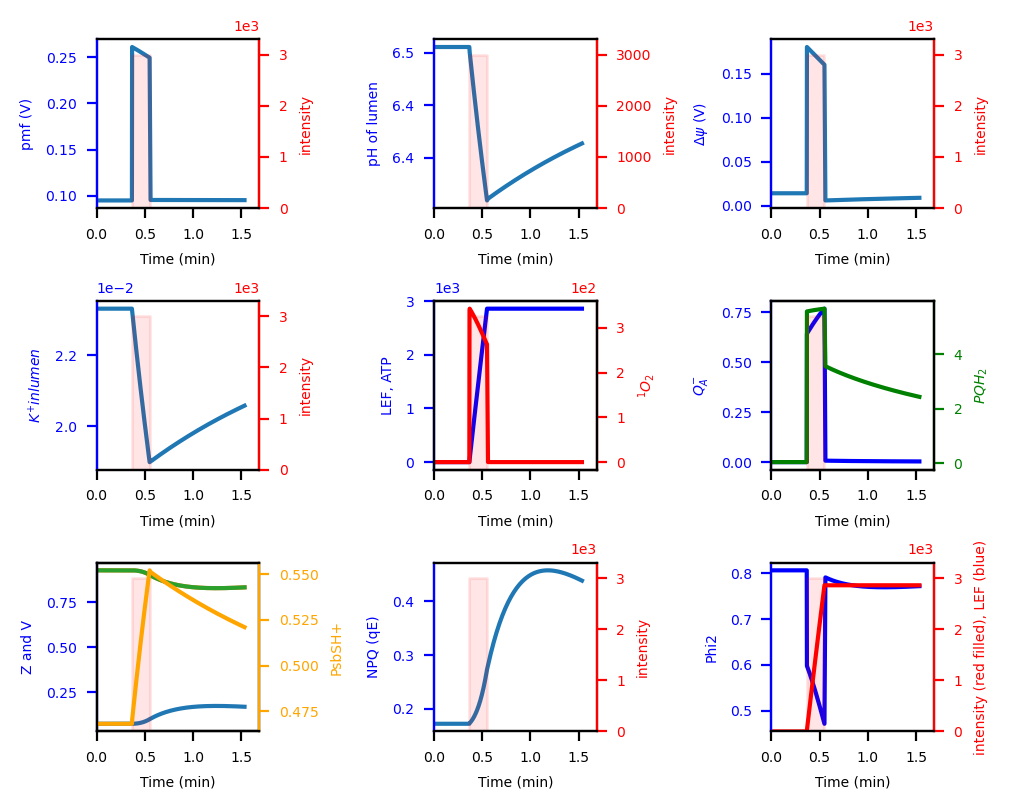

In [21]:
reload(dpp)

# generate a dictionary to hold the results of the simulations.
output_dict = {}
constants_dict = {}
starting_conditions_dict = {}


light = dpp.generate_square_wave_based_light_sequence(
                    baseline_duration=20,
                    baseline_intensity=0,
                    rise_time=0,
                    pulse_duration=10,
                    pulse_intensity=3000,
                    recovery_duration=60,
                    recovery_intensity=0,
                    point_frequency=1,
                    repeat_cycles=1,
                    time_units='seconds',
                    )

on = 'test'

# generate simulation constants
Kx = dpp.sim_constants()
Kx.k_KEA = 0
Kx.fraction_pH_effect = 0.25

constants_dict[on] = Kx

output_dict[on], starting_conditions_dict[on] = dpp.sim(Kx, 
                                                        original_dark_equilibrated_initial_y, 
                                                        light,
                                                        dpp.max_light_change, 
                                                        dpp.points_per_segment,
                                                        dark_equilibration=60
                                                        )

dpp.plot_interesting_stuff('Test', output_dict[on])

In [6]:
output_dict['test'].keys()

dict_keys(['QA', 'QAm', 'PQ', 'PQH2', 'Hin', 'pHlumen', 'Dy', 'pmf', 'DeltaGatp', 'Klumen', 'Kstroma', 'ATP_made', 'PC_ox', 'PC_red', 'P700_ox', 'P700_red', 'Z_array', 'V_array', 'NPQ_array', 'singletO2_array', 'Phi2_array', 'LEF_array', 'Fd_ox', 'Fd_red', 'ATP_pool', 'ADP_pool', 'NADPH_pool', 'NADP_pool', 'PhiNPQ', 'PhiNO', 'delta_pH', 'delta_pH_V', 'delta_pH_offset', 'delta_pH_V_offset', 'pmf_offset', 'Dy_offset', 'pmf_total', 'singletO2_rate', 'time_axis', 'time_axis_min', 'time_axis_h', 'end_state', 'light_curve', 'integrated_light', 'fraction_Dy', 'fraction_DpH', 'Z', 'V', 'NPQ', 'singletO2', 'Phi2', 'LEF', 'LEF_productive', 'LEF_to_NADPH', 'LEF_cumulative', 'normalized_LEF_cumulative', 'ATP_rate', 'NADPH', 'PsbS_protonated', 'b6f_control', 'Fd_rate', 'ATP/NADPH', 'K_flux', 'deficit', 'deficit_int', 'fract_deficit'])

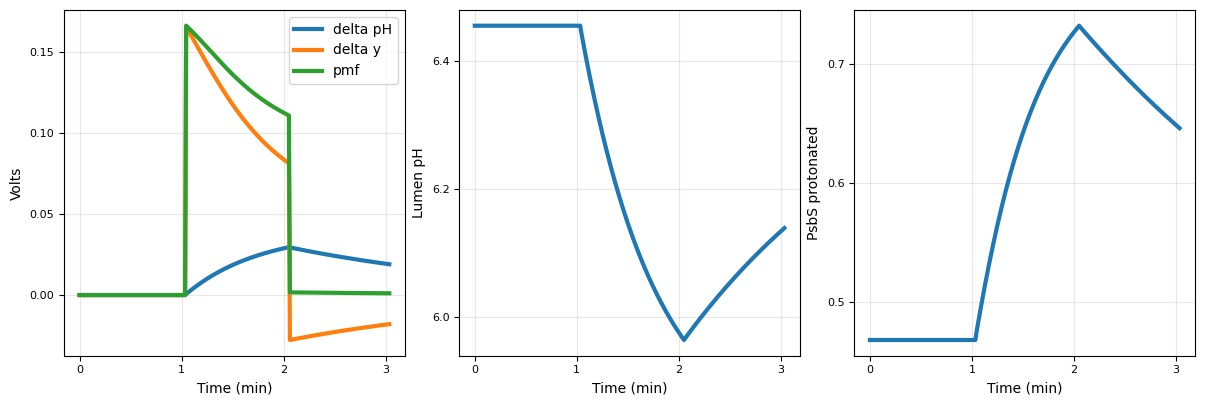

In [7]:
time = output_dict['test']['time_axis_min']

kwargs = {
    'lw': 3.0,
}

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(time, output_dict['test']['delta_pH_V_offset'], label='delta pH', **kwargs)
ax[0].plot(time, output_dict['test']['Dy_offset'], label='delta y', **kwargs)
ax[0].plot(time, output_dict['test']['pmf_offset'], label='pmf', **kwargs)
ax[0].set_ylabel('Volts', fontsize=10)
ax[0].legend(fontsize=10)

ax[1].plot(time, output_dict['test']['pHlumen'], **kwargs)
ax[1].set_ylabel('Lumen pH', fontsize=10)

ax[2].plot(time, output_dict['test']['PsbS_protonated'], **kwargs)
ax[2].set_ylabel('PsbS protonated', fontsize=10)

# ax[2].plot(time, output_dict['test']['PC_red'], **kwargs)
# ax[2].plot(time, output_dict['test']['Fd_red'], **kwargs)
# ax[2].plot(time, output_dict['test']['P700_red'], **kwargs)

for axis in ax.flatten():
    axis.grid(alpha=0.3)
    axis.set_xlabel('Time (min)', fontsize=10)
    axis.tick_params(labelsize=8)
    axis.locator_params(axis='both', nbins=5)

fig.tight_layout()
plt.show()